<a href="https://colab.research.google.com/github/MuhammadIqbal233/Minggu2_PCVK/blob/main/Minggu3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python-headless numpy


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload() # upload dataset

Saving babon.png to babon.png


In [ ]:
import cv2
import matplotlib.pyplot as plt

Mengubah ke warna negatif
-------------------------


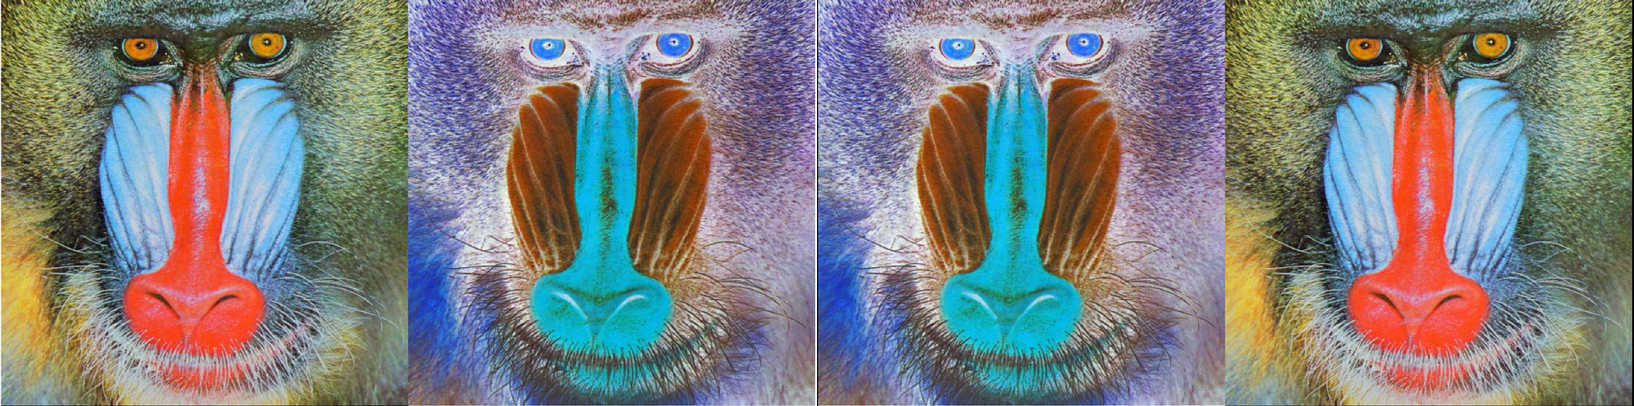

In [ ]:
print('Mengubah ke warna negatif')
print('-------------------------')

original = cv.imread('/content/babon.png')
negative_image = 255 - original

final_frame = cv.hconcat((original, negative_image))
cv2_imshow(final_frame)


Mengubah kontras citra
------------------------
Masukkan nilai kontras [0.5 mengurangi, 1.5 menambah]: 2.5
Masukkan nilai kecerahan [-10 mengurangi, 10 menambah]: -10


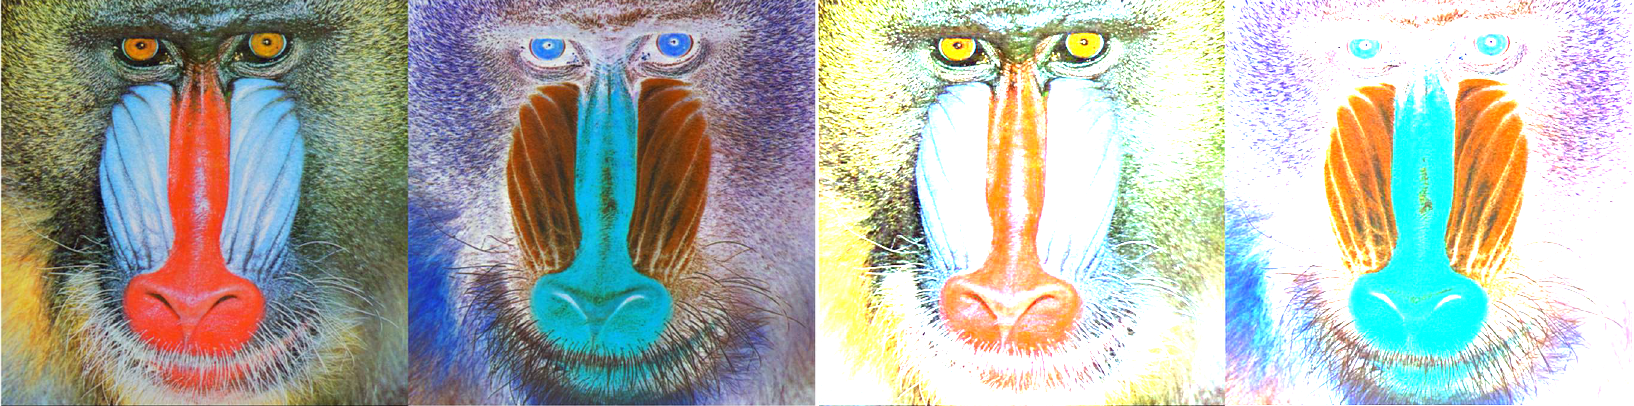

In [ ]:
print('Mengubah kontras citra')
print('------------------------')

original = cv.imread('/content/babon.png')

try:
    contrast = float(input('Masukkan nilai kontras [0.5 mengurangi, 1.5 menambah]: '))
    brightness2 = float(input('Masukkan nilai kecerahan [-10 mengurangi, 10 menambah]: '))

    cb_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness2)

    final_frame = cv.hconcat((original, cb_image))
    cv2_imshow(final_frame)
except ValueError:
    print('Error, nilai kontras harus berupa angka.')

Mengubah kecerahan citra secara logaritmik
------------------------------------------
Masukkan nilai kecerahan (positif untuk peningkatan, negatif untuk pengurangan): 60


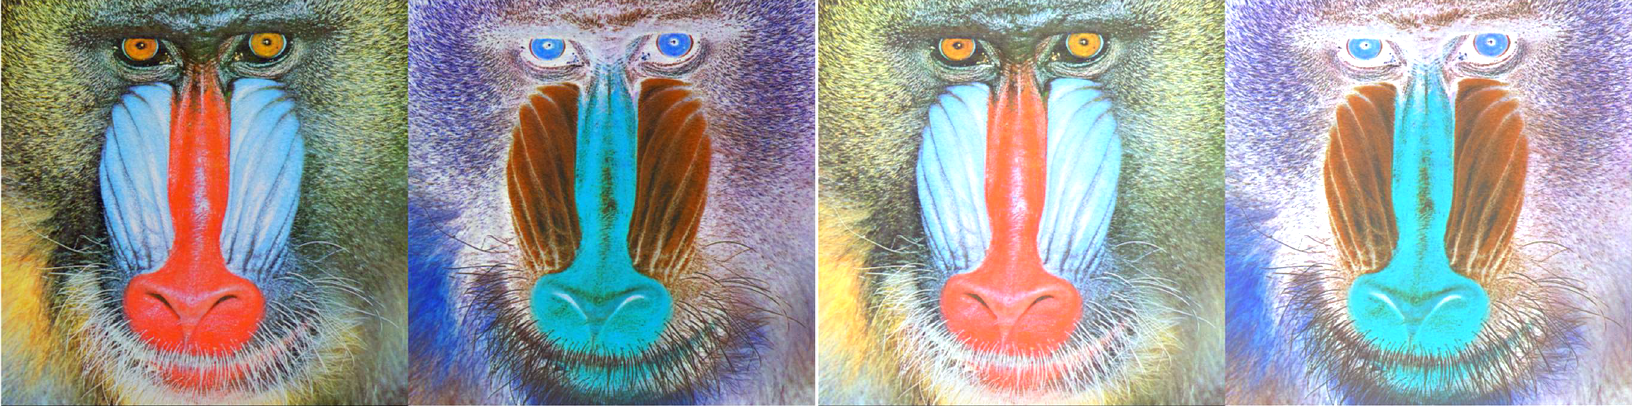

In [29]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah kecerahan citra secara logaritmik')
print('------------------------------------------')

original = cv.imread('/content/babon.png')

try:

    brightness = float(input('Masukkan nilai kecerahan (positif untuk peningkatan, negatif untuk pengurangan): '))
    modified_image = cv.convertScaleAbs(original, alpha=1, beta=abs(brightness))

    if brightness < 0:
        modified_image = 255 - modified_image

    final_frame = cv.hconcat((original, modified_image))
    cv2_imshow(final_frame)
except ValueError:
    print('Error, nilai kecerahan harus berupa angka.')


Transformasi ke Grayscale secara Manual (Average, Lightness, Luminance)
---------------------------------------------------------------------


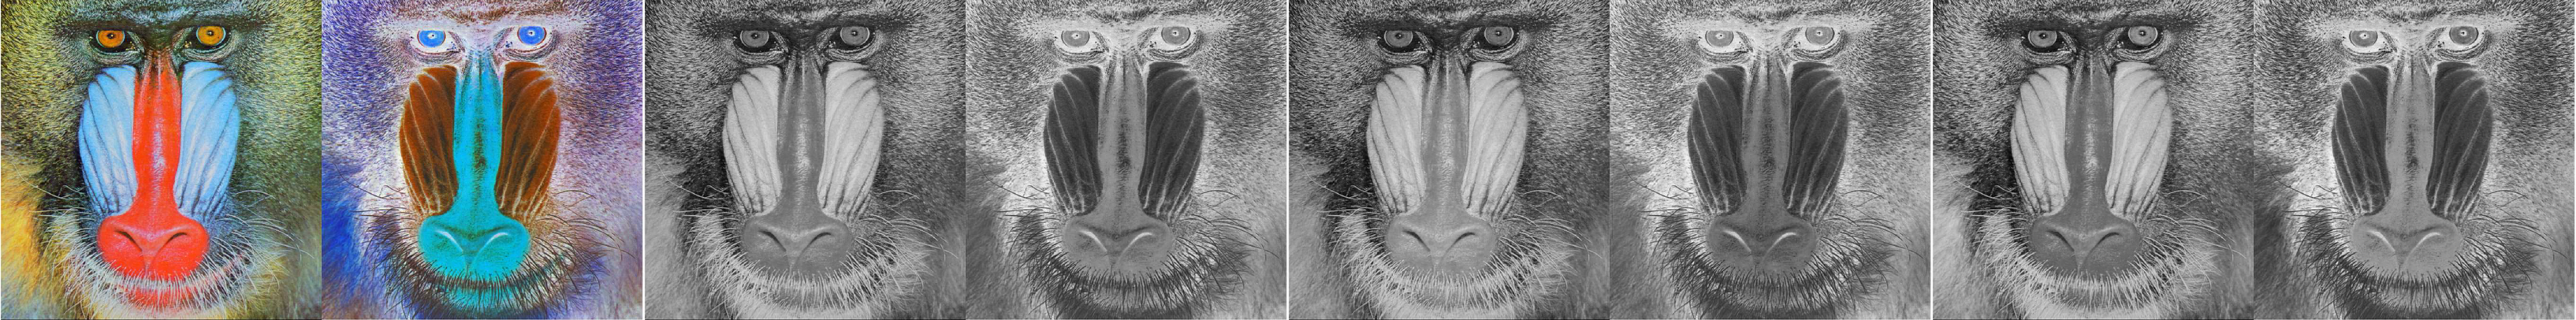

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Transformasi ke Grayscale secara Manual (Average, Lightness, Luminance)')
print('---------------------------------------------------------------------')

original = cv.imread('/content/babon.png')

height, width, _ = original.shape

gray_average = np.zeros((height, width), dtype=np.uint8)
gray_lightness = np.zeros((height, width), dtype=np.uint8)
gray_luminance = np.zeros((height, width), dtype=np.uint8)

for y in range(height):
    for x in range(width):
        b, g, r = original[y, x]

        gray_value_average = int((int(r) + int(g) + int(b)) / 3)
        gray_average[y, x] = gray_value_average

        gray_value_lightness = int((max(int(r), int(g), int(b)) + min(int(r), int(g), int(b))) / 2)
        gray_lightness[y, x] = gray_value_lightness

        gray_value_luminance = int(0.21 * r + 0.72 * g + 0.07 * b)
        gray_luminance[y, x] = gray_value_luminance

final_frame = cv.hconcat([original, cv.cvtColor(gray_average, cv.COLOR_GRAY2BGR), cv.cvtColor(gray_lightness, cv.COLOR_GRAY2BGR), cv.cvtColor(gray_luminance, cv.COLOR_GRAY2BGR)])
cv2_imshow(final_frame)

mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


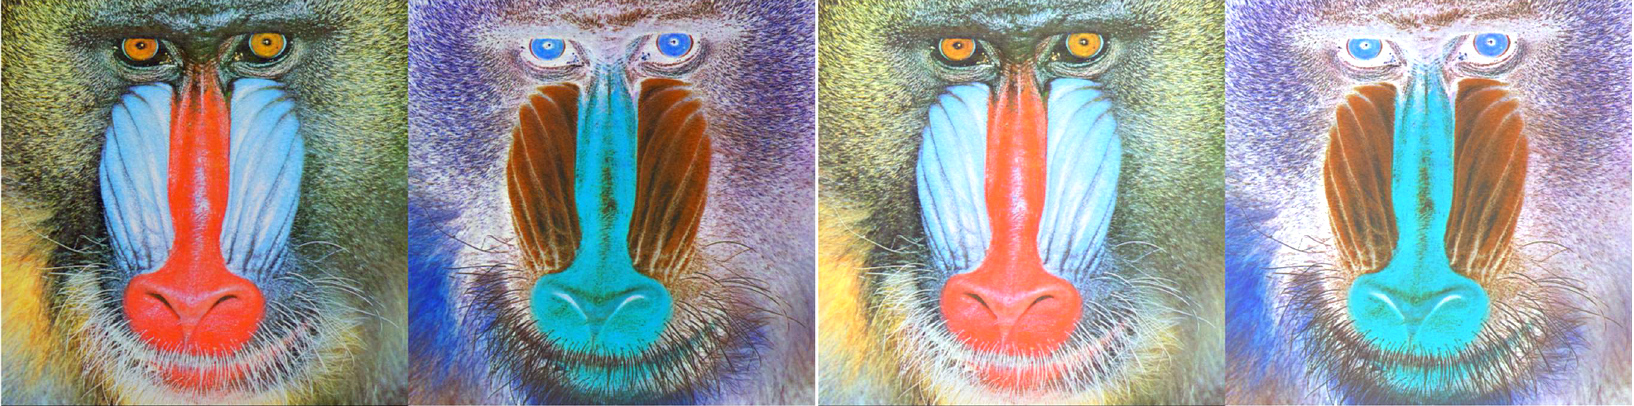

In [ ]:

print('mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/babon.png')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)
#tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Menampilkan Warna Biru dan Mengubah yang Lain menjadi Abu-abu
-----------------------------------------------------------


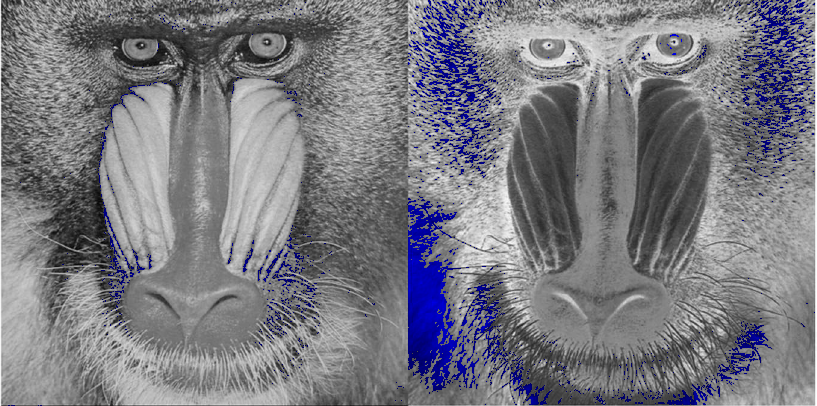

In [28]:
import cv2 as cv
from google.colab.patches import cv2_imshow

print('Menampilkan Warna Biru dan Mengubah yang Lain menjadi Abu-abu')
print('-----------------------------------------------------------')

# Membaca gambar asli
original = cv.imread('/content/babon.png')

# Menentukan batas warna biru dalam format BGR
lower_blue = np.array([100, 0, 0], dtype=np.uint8)
upper_blue = np.array([255, 100, 100], dtype=np.uint8)

# Membuat mask untuk warna biru
mask_blue = cv.inRange(original, lower_blue, upper_blue)

# Mengonversi gambar asli ke skala abu-abu
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Menampilkan saluran biru dalam gambar asli
blue_channel = original.copy()
blue_channel[:, :, 1] = 0  # Saluran hijau menjadi 0
blue_channel[:, :, 2] = 0  # Saluran merah menjadi 0

# Menggunakan mask untuk menggabungkan saluran biru dengan gambar asli
result = cv.bitwise_and(blue_channel, blue_channel, mask=mask_blue)

# Menggabungkan saluran biru dengan gambar skala abu-abu
result_gray = cv.bitwise_and(gray, gray, mask=cv.bitwise_not(mask_blue))

# Menggabungkan gambar biru dengan gambar abu-abu
result_final = cv.add(result, cv.cvtColor(result_gray, cv.COLOR_GRAY2BGR))

# Menampilkan gambar hasil
cv2_imshow(result_final)